<a href="https://colab.research.google.com/github/Rogerio-mack/Analise-de-Dados/blob/main/EDA_T6_Pandas_Transformacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Orlando Yesid Esparza Albarracin">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">

# Pandas Transformações

In [ ]:
import pandas as pd
import numpy as np

# Função: Concat

Podemos usar a função `concat` da biblioteca `Pandas` para concatenar ou unir duas bases de dados (DataFrames ou Series).

<img src="http://www.orlandoalbarracin.com.br/phyton/concat.png" width=750, align="center">

```
pd.concat([df1, df2] ,axis= ,join=' ',keys=[" ", " "])
```



### Exemplo

In [ ]:
# Informações qualidade do ar (PM 2.5 - material particulado) de duas cidades A e B no mês de março de 2020.

dfA = pd.DataFrame({
                    'Dia':['01/03/2020','02/03/2020', '03/03/2020', '04/03/2020'], 
               'Min': [6,7,10,4],
                 'Max': [104,111,116,143]}) 

dfB = pd.DataFrame({
                    'Dia':['01/03/2020','02/03/2020', '03/03/2020', '04/03/2020' ,'05/03/2020'], 
               'Min': [9,8,4,6,9],
               'Média': [60,76,70,65,57],
                 'Max': [90,94,102,100,106]})

In [ ]:
pd.concat([dfA, dfB],axis=1,join='inner',keys=["SP", "RJ"])

SP                   RJ               
          Dia Min  Max         Dia Min Média  Max
0  01/03/2020   6  104  01/03/2020   9    60   90
1  02/03/2020   7  111  02/03/2020   8    76   94
2  03/03/2020  10  116  03/03/2020   4    70  102
3  04/03/2020   4  143  04/03/2020   6    65  100

In [ ]:
pd.concat([dfA, dfB],axis=1,join='outer',keys=["SP", "RJ"])

SP                       RJ               
          Dia   Min    Max         Dia Min Média  Max
0  01/03/2020   6.0  104.0  01/03/2020   9    60   90
1  02/03/2020   7.0  111.0  02/03/2020   8    76   94
2  03/03/2020  10.0  116.0  03/03/2020   4    70  102
3  04/03/2020   4.0  143.0  04/03/2020   6    65  100
4         NaN   NaN    NaN  05/03/2020   9    57  106

In [ ]:
pd.concat([dfA, dfB],axis=0,join='inner',keys=["SP", "RJ"])

Dia  Min  Max
SP 0  01/03/2020    6  104
   1  02/03/2020    7  111
   2  03/03/2020   10  116
   3  04/03/2020    4  143
RJ 0  01/03/2020    9   90
   1  02/03/2020    8   94
   2  03/03/2020    4  102
   3  04/03/2020    6  100
   4  05/03/2020    9  106

In [ ]:
pd.concat([dfA, dfB],axis=0,join='outer',keys=["SP", "RJ"])

Dia  Min  Max  Média
SP 0  01/03/2020    6  104    NaN
   1  02/03/2020    7  111    NaN
   2  03/03/2020   10  116    NaN
   3  04/03/2020    4  143    NaN
RJ 0  01/03/2020    9   90   60.0
   1  02/03/2020    8   94   76.0
   2  03/03/2020    4  102   70.0
   3  04/03/2020    6  100   65.0
   4  05/03/2020    9  106   57.0

# Função: Merge



Podemos usar a função `merge` da biblioteca `Pandas` para concatenar ou unir duas bases de dados (DataFrames ou Series).


<img src="http://www.orlandoalbarracin.com.br/phyton/merge.png" width=850, align="center">

**Exemplo (Tabela 1)**: pd.merge(df1,df2, how='inner', on='A')


```
pd.merge(df1,df2, how=' ', on=' ', suffixes='')
```



### Exemplo 1

In [ ]:
# Informações de cidadãos 

df_1 = pd.DataFrame({'Nomes': ['André', 'Samuel', 'Antônio', 'Andrea'],
                    'telefone': [3162, 3112, 3004, 2410]})
df_2 = pd.DataFrame({'Nomes': ['Sergio', 'Samuel', 'Maria', 'Andrea'],
                    'Infração de trânsito': ["sim", "não", "não", "sim"]})

#### Inner
Interseção dos *DataFrames* usando como referência as chaves definidas em `on`.

In [ ]:
pd.merge(df_1,df_2, how='inner', on='Nomes')

,Nomes,telefone,Infração de trânsito
0,Samuel,3112,não
1,Andrea,2410,sim


#### Outer
União dos *DataFrames* usando como referência as chaves definidas em `on`.

In [ ]:
pd.merge(df_1,df_2, how='outer', on='Nomes')

,Nomes,telefone,Infração de trânsito
0,André,3162.0,NaN
1,Samuel,3112.0,não
2,Antônio,3004.0,NaN
3,Andrea,2410.0,sim
4,Sergio,NaN,sim
5,Maria,NaN,não


#### Left
União dos *DataFrames* considerando somemente os valores das chaves definidas em `on` do primeiro *DataFrames* (esquerda).

In [ ]:
pd.merge(df_1,df_2, how='left', on='Nomes' )

,Nomes,telefone,Infração de trânsito
0,André,3162,NaN
1,Samuel,3112,não
2,Antônio,3004,NaN
3,Andrea,2410,sim


#### Right
União dos *DataFrames* considerando somemente os valores das chaves definidas em `on` do segundo *DataFrames* (direita).

In [ ]:
pd.merge(df_1,df_2, how='right', on='Nomes')

,Nomes,telefone,Infração de trânsito
0,Sergio,NaN,sim
1,Samuel,3112.0,não
2,Maria,NaN,não
3,Andrea,2410.0,sim


### Exemplo 2

In [ ]:
dft = pd.DataFrame({'id': [1, 2, 3, 4], 
                        'Cidades': ['SP', 'BH', 'RJ', 'REC'],
                    'Temperatura máxima (°C)': [20, 25, 23, 27]})
dfu= pd.DataFrame({'id': [1, 2, 3, 4],
                          'Cidades': ['SP', 'BH', 'RJ', 'REC'],
                          'Umedade do ar(%)': [68, 53, 63, 71]})

In [ ]:
pd.merge(dft,dfu,how="outer",on=["id","Cidades"])

,id,Cidades,Temperatura máxima (°C),Umedade do ar(%)
0,1,SP,20,68
1,2,BH,25,53
2,3,RJ,23,63
3,4,REC,27,71


### Exemplo 3

In [ ]:
# dfh (Valores de hoje); dfo (valores de ontem)

dfh = pd.DataFrame({ 'Cidades': ['BH','SP', 'RJ', 'REC','DF'],
                    'Temp média(°C)': [20, 25, 23, 27,25]})
dfo= pd.DataFrame({'Cidades': ['SP', 'BH', 'RJ', 'REC'],
                          'Temp média(°C)': [23, 24, 26, 26]})

In [ ]:
pd.merge(dfh,dfo,how="outer",on=["Cidades"],suffixes=("_hoje","_ontem") )

,Cidades,Temp média(°C)_hoje,Temp média(°C)_ontem
0,BH,20,24.0
1,SP,25,23.0
2,RJ,23,26.0
3,REC,27,26.0
4,DF,25,NaN


# Função Melt

Podemos usar a função `melt` da biblioteca `Pandas` para reorganizar nossa base de dados.

<img src="http://www.orlandoalbarracin.com.br/phyton/melt2.png" width=650, align="center"> 

```
objeto.melt(id_vars=["chave_1",...,"chave_n"], value_vars=["var 1",..., " var j"], var_name=" ", value_name=" ")
```
Nota: Se não for especificado `value_vars`, consideram-se todas as variáveis (colunas) que não foram consideradas em `id_vars`.

### Exemplo

In [ ]:
# Exemplo: preços médios, em mil reais, de imóveis, segundo sua localização (zona e cidade) e seus metros quadrados (30,35,..,250)
dfi = pd.DataFrame(
{"Zona": ["Central", "Norte", "Sul", "Leste","Central", "Norte", "Sul", "Leste"],
 "cidade":["c1","c1","c1","c1","c2" ,"c2","c2","c2"],  
   "30": [400, 300, 500, 250,320,280,430,201],  
   "35": [460, 360, 615, 305,330,250,450,400],  
   "45": [540, 420, 675, 420,400,390,600,370],  
   "55": [620, 530, 760,490,500,440,800,700],  
   "100":[800, 690, 930, 600,750,600,920,920], 
   "250":[1500,1050,1950,920,1300,970,2100,2120],  
  })
dfi

,Zona,cidade,30,35,45,55,100,250
0,Central,c1,400,460,540,620,800,1500
1,Norte,c1,300,360,420,530,690,1050
2,Sul,c1,500,615,675,760,930,1950
3,Leste,c1,250,305,420,490,600,920
4,Central,c2,320,330,400,500,750,1300
5,Norte,c2,280,250,390,440,600,970
6,Sul,c2,430,450,600,800,920,2100
7,Leste,c2,201,400,370,700,920,2120



É necessário reorganizar a base de dados anterior se desejamos, por exemplo, ajustar um modelo de regressão para analisar os preços dos imóveis em função dos metros quadrados e da região em que estão localizados.

```
Estructura de um modelo de regressão:
Preços = b0(Zona) + b1(mt2) + b2(cidade)+ erro, em que b0, b1 e b2 são parâmetros (valores) que devem ser estimados.
```
Note que é necessário ter colunas com as variáveis: preços, zona, mt2 e cidade. Uma opção para restruturar a base de dados é implementar a função `melt` de `Pandas`

In [ ]:
# Opção 1
dfi.melt(id_vars=["Zona","cidade"],var_name="mt2",value_name="preço")

,Zona,cidade,mt2,preço
0,Central,c1,30,400
1,Norte,c1,30,300
2,Sul,c1,30,500
3,Leste,c1,30,250
4,Central,c2,30,320
5,Norte,c2,30,280
6,Sul,c2,30,430
7,Leste,c2,30,201
8,Central,c1,35,460
9,Norte,c1,35,360


Podemos estar interessados em analisar somente os imóveis com menos de 50 $mt^2$

In [ ]:
# Opção 2
dfi.melt(id_vars=["Zona","cidade"],value_vars=["30","35", "45"],var_name="mt2",value_name="preço")

,Zona,cidade,mt2,preço
0,Central,c1,30,400
1,Norte,c1,30,300
2,Sul,c1,30,500
3,Leste,c1,30,250
4,Central,c2,30,320
5,Norte,c2,30,280
6,Sul,c2,30,430
7,Leste,c2,30,201
8,Central,c1,35,460
9,Norte,c1,35,360


# Função: Pivot

Podemos usar a função `pivot` da biblioteca `Pandas` para reorganizar nossa base de dados. 

<img src="http://www.orlandoalbarracin.com.br/phyton/pivot2.png" width=550, align="center">

```
objeto.pivot(index=['chave_1,...,'chave_n'], columns=['var 1',..., 'Var j'], values='var k')
```




### Exemplo 1

In [ ]:
# Exemplo: Vendas realizadas, no mês, pelos empregados de uma loja.
df = pd.DataFrame({'Vendedor': ['Juan','Juan','Juan','André','André','André','Maria','Maria','Maria' ],
                   'Produto': ['Ref1','Ref2', 'Ref3','Ref1','Ref2', 'Ref3', 'Ref1','Ref2', 'Ref3'],
                   'Vendas': [6,2,5,8,4,7,9,1,3],
                   'Preços': [60,100,210,60,100,210,60,100,210]})
df

,Vendedor,Produto,Vendas,Preços
0,Juan,Ref1,6,60
1,Juan,Ref2,2,100
2,Juan,Ref3,5,210
3,André,Ref1,8,60
4,André,Ref2,4,100
5,André,Ref3,7,210
6,Maria,Ref1,9,60
7,Maria,Ref2,1,100
8,Maria,Ref3,3,210


In [ ]:
df.pivot(index=['Produto'], columns=['Vendedor'], values='Vendas')

Vendedor,André,Juan,Maria
Produto,,,
Ref1,8,6,9
Ref2,4,2,1
Ref3,7,5,3


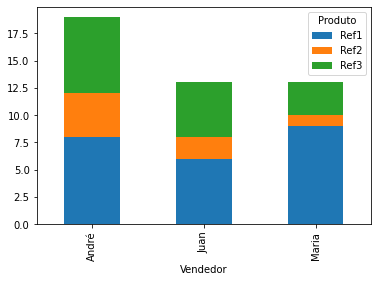

In [ ]:
# Sempre é interessante fazer um gráfico

df1=df.pivot(index=['Vendedor'], columns=['Produto'], values='Vendas')
df1.plot(kind="bar",stacked=True);

### Exemplo 2

Uma das aplicações mais interessantes dessa função é para análisar séries temporais, isto é, observações que mudam ao longo do tempo.

In [ ]:
# Exemplo: Temperaturas diárias, por hora, das cidades Recife e Belo horizonte no mês de janeiro de 2020
df_t=pd.read_excel("http://www.orlandoalbarracin.com.br/phyton/Temperatura.xlsx")
df_t

,Data,Hora,Cidade,Temp_Ar,Temp_max,Temp_min
0,2020-01-01,0,BH,20.2,20.7,20.1
1,2020-01-01,0,REC,27.5,27.5,27.4
2,2020-01-01,1,BH,19.8,20.2,19.7
3,2020-01-01,1,REC,27.1,27.5,27.1
4,2020-01-01,2,BH,19.6,20.0,19.6
...,...,...,...,...,...,...
1483,2020-01-31,21,REC,28.9,28.2,69.0
1484,2020-01-31,22,BH,23.5,24.1,23.3
1485,2020-01-31,22,REC,28.3,27.6,73.0
1486,2020-01-31,23,BH,23.0,23.8,23.0


In [ ]:
# Error: Index contains duplicate entries, cannot reshape
df_t.pivot(index=['Data'], columns=["Cidade"], values=['Temp_max'])

In [ ]:
df_t.pivot(index=['Data','Hora'], columns=['Cidade'], values=['Temp_max'])

Temp_max      
Cidade                BH   REC
Data       Hora               
2020-01-01 0        20.7  27.5
           1        20.2  27.5
           2        20.0  27.3
           3        19.6  27.0
           4        19.2  26.4
...                  ...   ...
2020-01-31 19       26.3  29.8
           20       28.3  28.8
           21       26.8  28.2
           22       24.1  27.6
           23       23.8  27.7

[744 rows x 2 columns]

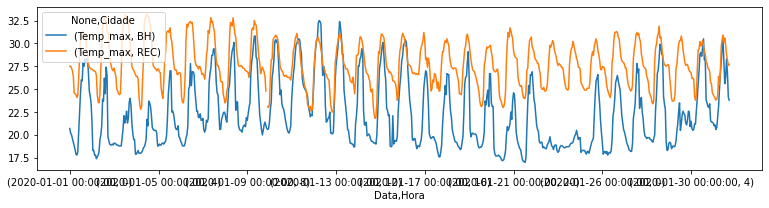

In [ ]:
# Sempre é interessante fazer um gráfico

df2=df_t.pivot(index=['Data','Hora'], columns=['Cidade'], values=['Temp_max'])
df2.plot(figsize=(13,3)); 

No gráfico anterior, no eixo x, foi usando o `index=['Data','Hora']`
cujo formato, por *default*, é "2020-01-01 00:00:00, h".
Segue um código (opcional)  para melhorar o eixo x.

Nota: Próximas aulas estudaremos uma *library* que nos permitirá fazer gráficos com mais opções.


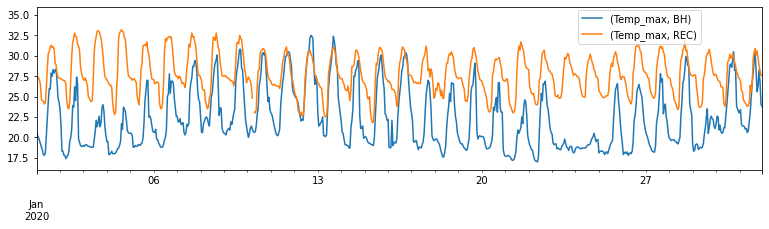

In [ ]:
# Modificando o index para melhorar o gráfico (É uma opção)
df2.index=pd.date_range(start = "2020-01-01 00:00:00", end = "2020-01-31 23:00:00", freq = "H")
df2.plot(figsize=(13,3),ylim=(16,36)).legend(bbox_to_anchor=(0.74, 0.74));

# Exercícios

## Exercício 1

A seguinte base de dados apresenta, para 142 países, no período de 1952 a 2007,  as seguintes variáveis: 

- Esperança de vida (Life expectancy) \
- PIB per capita (GDP per capita) \
- População  

In [ ]:
link = "https://goo.gl/ioc2Td"
Data = pd.read_csv(link)
Data

1.1. Crie três DataFrames, usando a função `melt`, com as seguintes variáveis (colunas):

DataFrame1: Continent, country, year e life expectancy \
DataFrame2: Continent, country, year e GDP per capita \
DataFrame3: Continent, country, year e Population \

1.2 Usando a função `merge` junte, da melhor forma, os três `DataFrames` anteriores.

1.3 Apresente o PIB per capita médio de 2007 segundo o continente

In [ ]:
# Loc function, access a group of rows and columns by label(s) or a boolean array.
# Retorna uma coluna inteira
Data.loc[:,["country"]]

In [ ]:
# Colunas que contêm as palavras: lifeExp,continent,country. Resultado: a boolean array
Data.columns.str.contains('continent|country|lifeExp')

In [ ]:
# Selecioando as colunas desejadas para o DataFrame1
Dat_LE = Data.loc[:, Data.columns.str.contains('continent|country|lifeExp')]
Dat_LE

In [ ]:
# Usando a função melt
Df1=Dat_LE.melt(id_vars=["continent","country"],var_name="year",value_name="life expectancy")
Df1

In [ ]:
# Eliminando a palavra "lifeExp_" e convertendo a coluna numa variável numérica
Df1.year = Df1.year.str.replace("lifeExp_","").astype(int)
Df1

## Exercício 2

Nas bases de dados "Bdados1" e "Bdados2" encontrará informações de funcionários de uma multinacional.

2.1. Usando *Data1* calcule as idades médias e o número médio de filhos dos empregados, segundo o setor onde trabalham.

2.2. Usando *Data2* calcule os salários médios e o os anos médios de experiência dos empregados, segundo o setor onde trabalham.

2.3. Concatene, da melhor forma, os dois DataFrames anteriores (use a função `concat`).

In [ ]:
link1="http://www.orlandoalbarracin.com.br/phyton/BDados1.xlsx"
Data1=pd.read_excel(link1)
link2="http://www.orlandoalbarracin.com.br/phyton/BDados2.xlsx"
Data2=pd.read_excel(link2)

## Exercício 3

N0 arquivo "Bdados3" apresentam-se informações de 300 funcionários que participarão de uma pesquisa.

link3="http://www.orlandoalbarracin.com.br/phyton/BDados3.xlsx"

2.1. Concatene, da melhor forma, Data1 e Data3, usando a função `concat`. Verifique se é interessante analisar a "união" desses dados. 

2.2. Concatene, da melhor forma, Data1 e Data2, usando a função `concat`. Verifique se é interessante analisar a "união" desses dados. 

2.3. Usando o DataFrame do item anterior calcule a porcentagem de empregados que ganham pelo menos 5 mil reais segundo o Sexo e o Estado cívil.

In [ ]:
link3="http://www.orlandoalbarracin.com.br/phyton/BDados3.xlsx"
Data3=pd.read_excel(link3)
Data3

## Exercício 4

Use a função `merge` para fazer os seguinte itens

4.1. Junte, da melhor forma, os DataFrames Data1 e Data3. Posteriormente, calcule o número de funcionários que participarão da pesquisa, segundo as variáveis Sexo e Filial

O arquivo "BDados4" contêm informações dos empregados que serão promovidos. 
link4="http://www.orlandoalbarracin.com.br/phyton/BDados4.xlsx"

4.2. Quantos funcionários, que participarão da pesquisa, serão promovidos? Quantos deles têm mestrado?

4.3 Apresente um DataFrame ou Serie com a Identidade funcional e os telefones dos funcionários que participarão da pesquisa e serão promovidos.


In [ ]:
link4="http://www.orlandoalbarracin.com.br/phyton/BDados4.xlsx"
Data4=pd.read_excel(link4)

## Exercício 5

O arquivo "USD_EUR" apresenta as variáveis: Abertura, Máxima, Mínimo, Último, Var% do USD/BRL e EUR/BRL no período de 01/01/2020 a 01/04/2021.

- Organize a base de dados usando a função `pivot`
- Faça um gráfico dos valores últimos (Fechamento diários) do Dólar e do Euro

In [ ]:
link5="http://www.orlandoalbarracin.com.br/phyton/USD_EUR.xlsx"
df_UE=pd.read_excel(link5)
df_UE